In [237]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
import xarray as xr
#xr.set_options(display_style='html');
#import shapefile
#import pygmt
#import requests
#import geopandas as gpd
#from shapely.geometry import Point
#import os

In [140]:
from IPython import display
display.set_matplotlib_formats('retina')

In [233]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [235]:
eqs = pd.read_csv(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.csv',
                  sep=',',index_col='time')
eqs.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes
time,,,,,,,,,,,
2020-01-12 00:59:58.000,3.0,543,-61.484,-54.521,0.310,0.924,39.226,200.92,201.2,EQ,East of network... bad locatoin.
2020-01-12 01:18:58.200,5.0,54321,-61.634,-52.338,0.326,1.277,49.447,218.23,218.6,EQ,Show BOB Located North and East -61.6 -52.4 is...
2020-01-12 01:36:58.200,3.0,543,-62.246,-57.490,0.467,1.517,62.145,190.35,190.6,EQ,Possible rift East of Caldera
2020-01-12 02:08:05.000,3.0,543,-62.044,-58.270,0.140,0.043,9.413,188.79,189.0,EQ,under KGI
2020-01-12 03:06:36.400,5.0,65432,-61.622,-55.013,0.238,0.225,2.563,192.34,192.6,EQ,NE of KGI and Network. -61.6 -55


In [216]:
eqs.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3.871429,77166.100000,-62.287714,-57.751329,0.235700,0.355000,15.776086,194.079286,194.311429
std,1.115392,179946.358446,1.904895,2.544067,0.507682,0.654673,28.600132,9.391853,9.451885
min,3.000000,123.000000,-71.907000,-64.307000,0.006000,0.004000,0.087000,177.920000,177.900000
25%,3.000000,432.000000,-62.763000,-58.912750,0.027500,0.028250,1.050250,188.880000,189.100000
50%,3.000000,608.500000,-62.396500,-57.755500,0.052000,0.065500,3.251000,193.000000,193.150000
75%,5.000000,39881.000000,-62.143500,-57.033500,0.169000,0.248500,10.261750,197.352500,197.600000
max,6.000000,654321.000000,-55.198000,-50.081000,2.993000,3.134000,99.999000,229.760000,230.100000


### Mapping eq data
Let's make some maps just because we can.

In [197]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

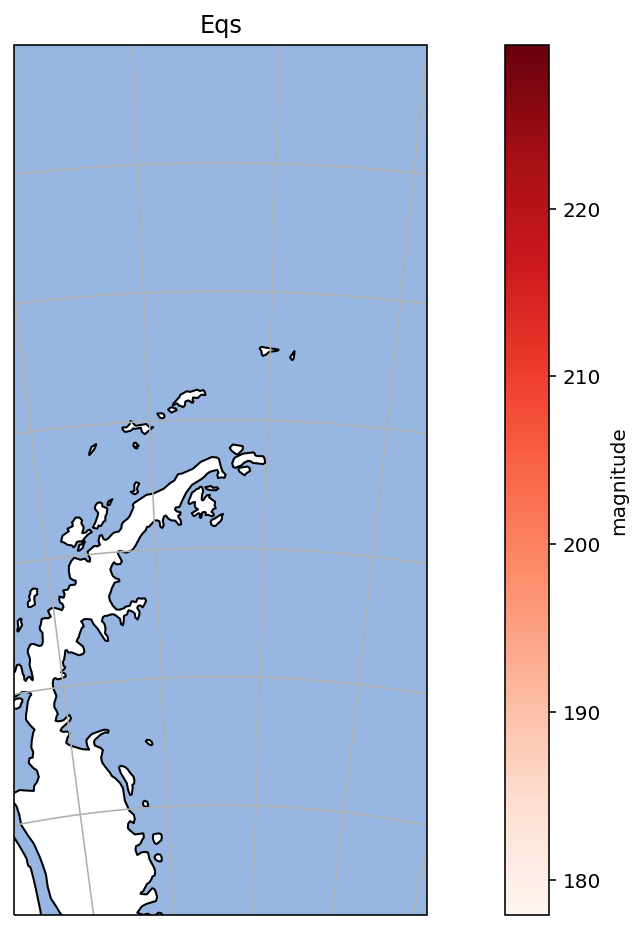

In [272]:
ax = plt.axes(projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))
sc = ax.scatter(eqs.ep_lon, eqs.ep_lat,
                c=eqs.mdb, s=40,
                edgecolor='k', cmap='Reds',
                transform=ccrs.UTM(21, southern_hemisphere=True, globe=None))
plt.colorbar(sc, label='magnitude')
ax.gridlines()
ax.set_title('Eqs');
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
extent = [-50.0 ,-64, -55, -72]
ax.set_extent(extent)

# Scratch

In [228]:
# Set up a standard map for latlon data.
geo_axes = pyplot.axes(projection=cartopy.crs.PlateCarree())

# Set up an OSGB map.
geo_axes = pyplot.subplot(2, 2, 1, projection=cartopy.crs.OSGB())

NameError: name 'pyplot' is not defined